In [20]:
#import required libraries

import os
import cv2
import glob
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential

In [11]:
#process images for training and testing 
def create_data(dataPath):
    X = []
    Y = []
    for path in glob.glob(dataPath):
        img_label = path.split("\\")[-1]
        for img_path in glob.glob(os.path.join(path, "*.jpg")):
            img = cv2.imread(img_path)
            img = cv2.resize(img, (64, 64))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            X.append(img)
            Y.append(img_label)
    X = np.array(X)
    Y = np.array(Y)
    return X, Y

def create_labels(Y):
    labels = {i : j for j, i in enumerate(np.unique(Y))}
    ids = np.array([labels[i] for i in Y])
    return ids

In [50]:
#to test individual images

def for_test(path):
    X = []
    for ip in glob.glob(os.path.join(path)):
        img = cv2.imread(ip)
        img = cv2.resize(img, (64, 64))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        X.append(img)
    X = np.array(X)
    return X

In [16]:
trainX, trainY = create_data("Training/*")
testX, testY = create_data("Test/*")

In [17]:
trainX = trainX/255.0 
testX = testX/255.0 
trainlabels = create_labels(trainY)
testlabels = create_labels(testY)

In [22]:
model = Sequential()

model.add(keras.layers.Conv2D(32, (3, 3), input_shape = (64, 64, 3), padding = "same", activation = "relu"))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

model.add(keras.layers.Conv2D(64, (3, 3), padding = "same", activation = "relu"))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

model.add(keras.layers.Conv2D(64, (3, 3), padding = "same", activation = "relu"))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

model.add(keras.layers.Conv2D(128, (3, 3), padding = "same", activation = "relu"))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation = "relu"))
model.add(keras.layers.Dense(81, activation = "softmax"))

model.compile(loss = "sparse_categorical_crossentropy", optimizer = keras.optimizers.Adamax(), metrics = ['accuracy'])
model.fit(trainX, trainlabels, batch_size = 128, epochs = 5)

Epoch 1/5
41322/41322 [==============================] - 20s - loss: 1.0166 - acc: 0.7282    
Epoch 2/5
41322/41322 [==============================] - 18s - loss: 0.1544 - acc: 0.9751    
Epoch 3/5
41322/41322 [==============================] - 17s - loss: 0.0862 - acc: 0.9881    
Epoch 4/5
41322/41322 [==============================] - 17s - loss: 0.1043 - acc: 0.9925    
Epoch 5/5
41322/41322 [==============================] - 17s - loss: 0.1090 - acc: 0.9903    


In [27]:
_, accuracy = model.evaluate(testX, testlabels)

13728/13877 [============================>.] - ETA: 0s

Test Accuracy:  0.9630323556964762


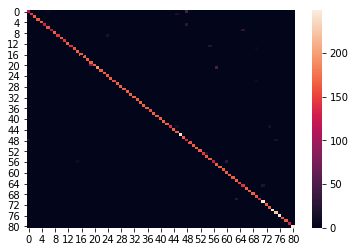

In [74]:
import sklearn
import sklearn.metrics
import seaborn as sns
predicted_probs = model.predict(testX)
predicted_classes = np.argmax(predicted_probs, axis=1)
print("Test Accuracy: ", sklearn.metrics.accuracy_score(testlabels, predicted_classes))
print(sklearn.metrics.confusion_matrix(testlabels, predicted_classes))
sns.heatmap(sklearn.metrics.confusion_matrix(testlabels, predicted_classes));

In [63]:
def make_prediction(path):
    image = for_test(path)
    labels = {i : j for j, i in enumerate(np.unique(trainY))}
    id_dict = {i : j for j, i in labels.items()}
    pred = model.predict_classes(image)[0]
    label = id_dict[pred]
    plt.imshow(image[0])
    return label

1/1 [==============================] - 0s


'Banana'

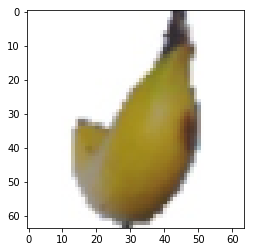

In [78]:
make_prediction(r'D:\Downloads\fruits\fruits-360\Test\Banana\15_100.jpg')

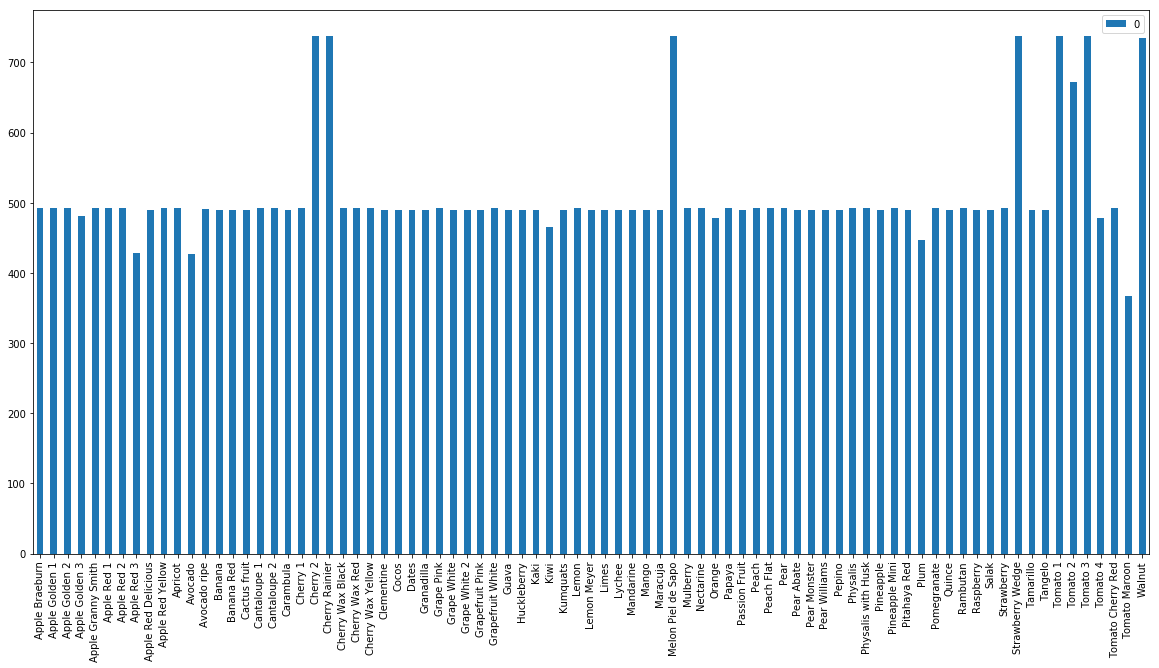

In [91]:
#class frequencies in train set
import pandas
from collections import Counter
letter_counts = Counter(list(trainY))
df = pandas.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind='bar',figsize=(20,10))

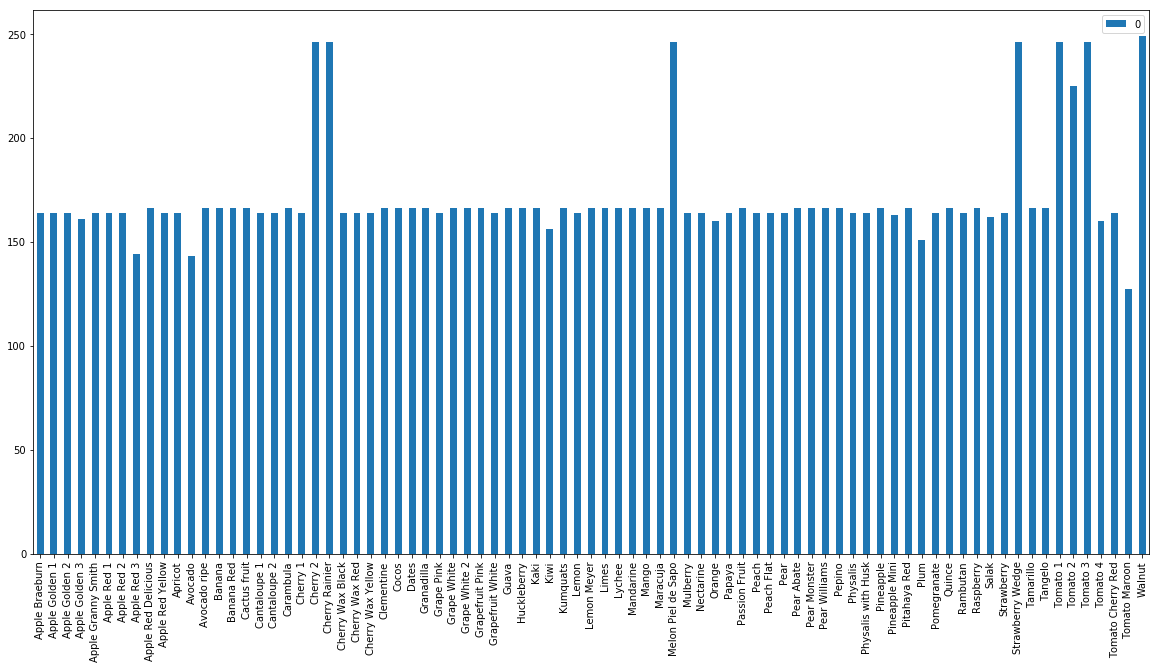

In [92]:
#class frequencies in test set
letter_counts = Counter(list(testY))
df = pandas.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind='bar',figsize=(20,10))